In [35]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as sn
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
url = "https://raw.githubusercontent.com/Ludmila-Garcia/telecomx-churn-prediction/main/data/raw/dados_tratados.csv"

dados = pd.read_csv(url)
dados.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Contas_Diarias
0,0002-ORFBO,0.0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.155059
1,0003-MKNFE,0.0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,1.0,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.427727
3,0011-IGKFF,1.0,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,1.0,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.756242


In [10]:
dados.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total', 'Contas_Diarias'],
      dtype='object')

In [12]:
# Removendo a coluna identificadora
dados = dados.drop(columns=['customerID'])

In [15]:
# Listando as colunas categóricas para transformar
categorical_cols = [
    'customer_gender', 'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies',
    'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod'
]

# Aplicando One-Hot Encoding
dados_encoded = pd.get_dummies(dados, columns=categorical_cols, drop_first=True)

# Verificando as novas colunas criadas
dados_encoded.head()


,Churn,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly,account_Charges.Total,Contas_Diarias,customer_gender_male,customer_Partner_1,customer_Dependents_1,phone_PhoneService_1,...,internet_StreamingTV_1,internet_StreamingTV_no internet service,internet_StreamingMovies_1,internet_StreamingMovies_no internet service,account_Contract_one year,account_Contract_two year,account_PaperlessBilling_1,account_PaymentMethod_credit card (automatic),account_PaymentMethod_electronic check,account_PaymentMethod_mailed check
0,0.0,0,9,65.6,593.30,2.155059,False,True,True,True,...,True,False,False,False,True,False,True,False,False,True
1,0.0,0,9,59.9,542.40,1.967806,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,1.0,0,4,73.9,280.85,2.427727,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1.0,1,13,98.0,1237.85,3.219448,True,True,False,True,...,True,False,True,False,False,False,True,False,True,False
4,1.0,1,3,83.9,267.40,2.756242,False,True,False,True,...,True,False,False,False,False,False,True,False,False,True


In [16]:
dados_encoded.columns

Index(['Churn', 'customer_SeniorCitizen', 'customer_tenure',
       'account_Charges.Monthly', 'account_Charges.Total', 'Contas_Diarias',
       'customer_gender_male', 'customer_Partner_1', 'customer_Dependents_1',
       'phone_PhoneService_1', 'phone_MultipleLines_1',
       'phone_MultipleLines_no phone service',
       'internet_InternetService_fiber optic', 'internet_InternetService_no',
       'internet_OnlineSecurity_1',
       'internet_OnlineSecurity_no internet service',
       'internet_OnlineBackup_1', 'internet_OnlineBackup_no internet service',
       'internet_DeviceProtection_1',
       'internet_DeviceProtection_no internet service',
       'internet_TechSupport_1', 'internet_TechSupport_no internet service',
       'internet_StreamingTV_1', 'internet_StreamingTV_no internet service',
       'internet_StreamingMovies_1',
       'internet_StreamingMovies_no internet service',
       'account_Contract_one year', 'account_Contract_two year',
       'account_PaperlessBill

**Verificação da Proporção de Evasão**

In [17]:
# Contagem de cada classe na coluna 'Churn'
contagem_churn = dados_encoded['Churn'].value_counts()

# Proporção de cada classe
proporcao_churn = dados_encoded['Churn'].value_counts(normalize=True) * 100

print("Contagem de clientes por status de evasão:")
print(contagem_churn)

print("\nProporção de clientes por status de evasão (%):")
print(proporcao_churn)


Contagem de clientes por status de evasão:
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporção de clientes por status de evasão (%):
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


In [19]:
!pip install imbalanced-learn

In [25]:
print(dados_encoded['Churn'].isnull().sum())


224


In [26]:
dados_encoded = dados_encoded.dropna(subset=['Churn'])

In [27]:
print(dados_encoded[dados_encoded['Churn'].isnull()])


Empty DataFrame
Columns: [Churn, customer_SeniorCitizen, customer_tenure, account_Charges.Monthly, account_Charges.Total, Contas_Diarias, customer_gender_male, customer_Partner_1, customer_Dependents_1, phone_PhoneService_1, phone_MultipleLines_1, phone_MultipleLines_no phone service, internet_InternetService_fiber optic, internet_InternetService_no, internet_OnlineSecurity_1, internet_OnlineSecurity_no internet service, internet_OnlineBackup_1, internet_OnlineBackup_no internet service, internet_DeviceProtection_1, internet_DeviceProtection_no internet service, internet_TechSupport_1, internet_TechSupport_no internet service, internet_StreamingTV_1, internet_StreamingTV_no internet service, internet_StreamingMovies_1, internet_StreamingMovies_no internet service, account_Contract_one year, account_Contract_two year, account_PaperlessBilling_1, account_PaymentMethod_credit card (automatic), account_PaymentMethod_electronic check, account_PaymentMethod_mailed check]
Index: []

[0 rows x

In [40]:
X = dados_encoded.drop(columns=['Churn'])
y = dados_encoded['Churn']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


print("Antes do balanceamento:")
print(y.value_counts())

print("\nDepois do balanceamento:")
print(y_resampled.value_counts())

dados_balanceados = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Churn')], axis=1)

print("\nDados balanceados - primeiras linhas:")
print(dados_balanceados.head())

Antes do balanceamento:
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Depois do balanceamento:
Churn
0.0    5174
1.0    5174
Name: count, dtype: int64

Dados balanceados - primeiras linhas:
   customer_SeniorCitizen  customer_tenure  account_Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account_Charges.Total  Contas_Diarias  customer_gender_male  \
0                 593.30        2.155059                 False   
1                 542.40        1.967806                  True   
2                 280.85        2.427727                  True   
3                1237.85        3.219448                  True   
4                 267.40        2.756242  

In [34]:
from sklearn.preprocessing import StandardScaler

# Colunas numéricas para escalar
num_cols = ['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total', 'Contas_Diarias']

scaler = StandardScaler()

# Ajustar e transformar os dados numéricos
dados_balanceados[num_cols] = scaler.fit_transform(dados_balanceados[num_cols])

# Verificar resultado
print(dados_balanceados[num_cols].head())


   customer_tenure  account_Charges.Monthly  account_Charges.Total  \
0        -0.777767                -0.084654              -0.665588   
1        -0.777767                -0.283131              -0.688872   
2        -0.986220                 0.204358              -0.808517   
3        -0.611005                 1.043536              -0.370739   
4        -1.027911                 0.552565              -0.814670   

   Contas_Diarias  
0       -0.084654  
1       -0.283131  
2        0.204358  
3        1.043536  
4        0.552565  


**Análise de Correlação**

Correlação com a evasão (Churn):
Churn                      1.000000
account_Charges.Monthly    0.235597
Contas_Diarias             0.235597
customer_SeniorCitizen     0.019766
account_Charges.Total     -0.230814
customer_tenure           -0.413333
Name: Churn, dtype: float64


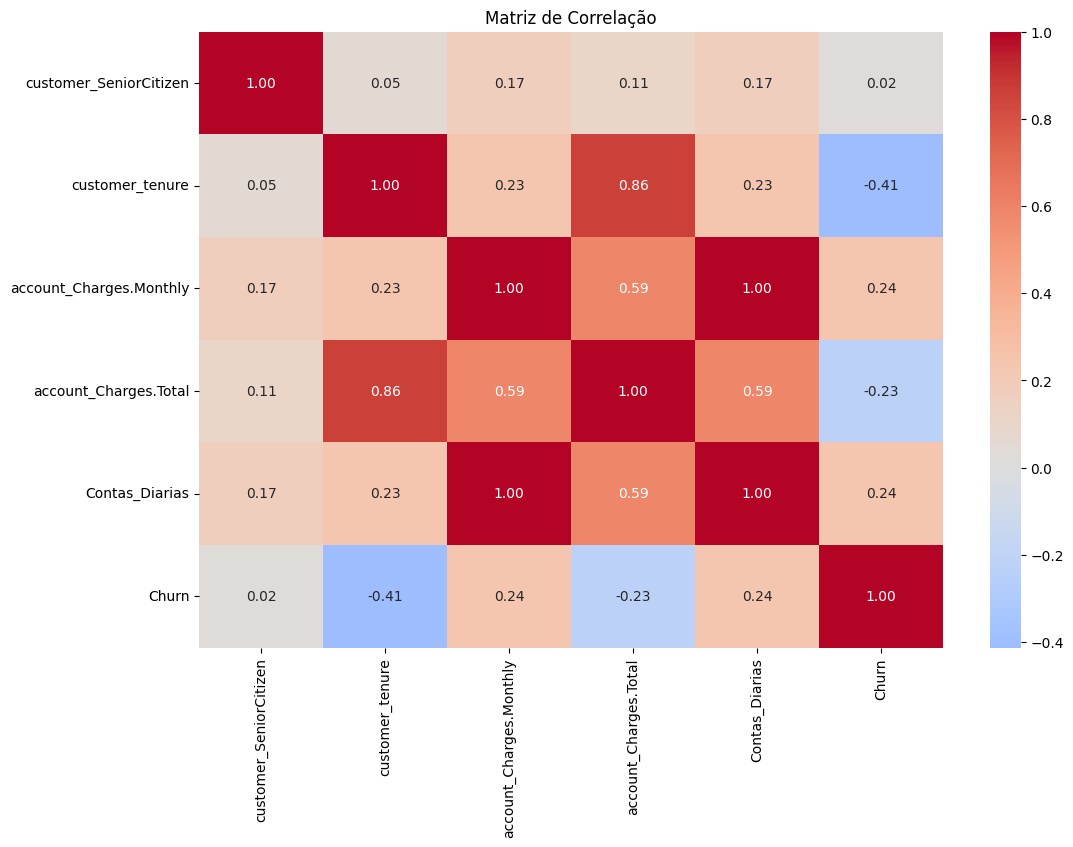

In [36]:
# Selecionar colunas numéricas (incluindo 'Churn')
numerical_cols = dados_balanceados.select_dtypes(include=['float64', 'int64']).columns

# Calcular matriz de correlação
corr_matrix = dados_balanceados[numerical_cols].corr()

# Exibir a correlação da variável alvo com as outras
print("Correlação com a evasão (Churn):")
print(corr_matrix['Churn'].sort_values(ascending=False))

# Plotar heatmap da matriz de correlação
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

/tmp/ipython-input-3262265751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer_tenure', data=dados_balanceados, palette='Set2')


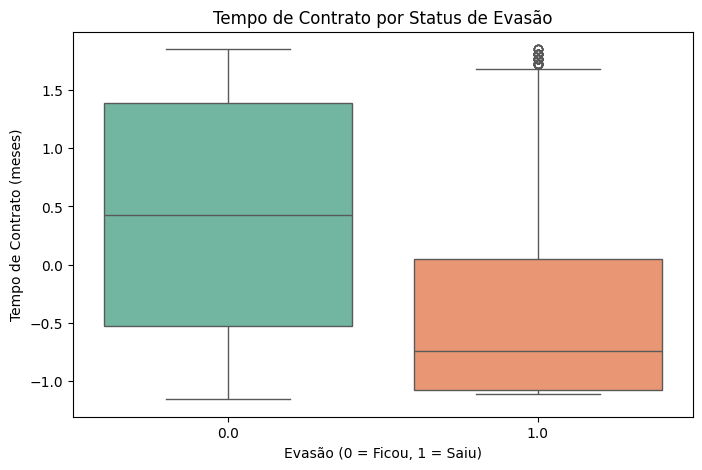

/tmp/ipython-input-3262265751.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account_Charges.Total', data=dados_balanceados, palette='Set3')


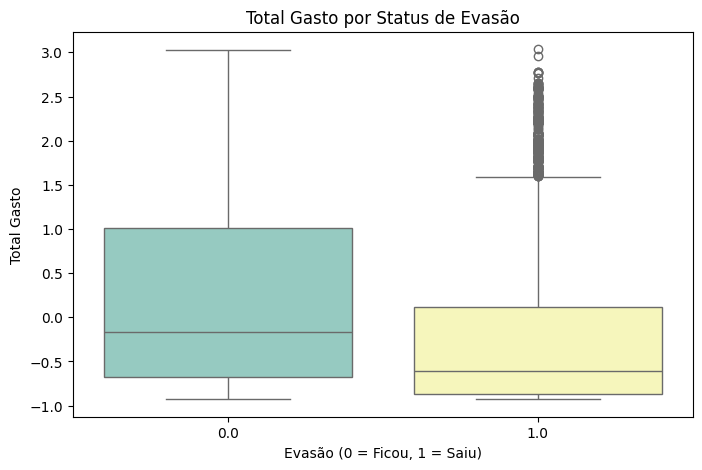

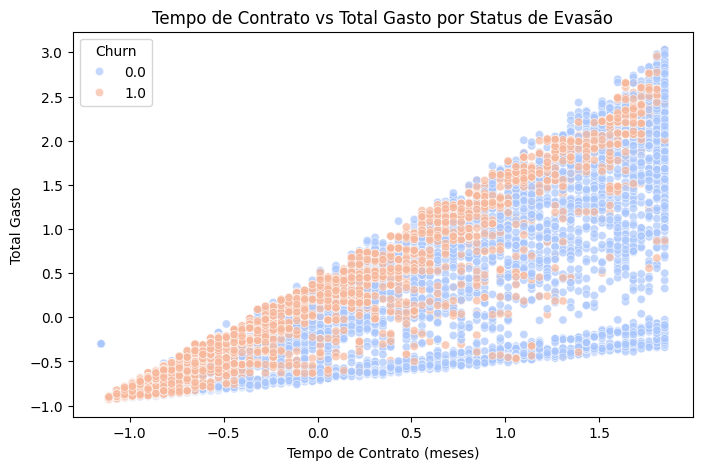

In [37]:

# Boxplot: Tempo de contrato vs Evasão
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='customer_tenure', data=dados_balanceados, palette='Set2')
plt.title('Tempo de Contrato por Status de Evasão')
plt.xlabel('Evasão (0 = Ficou, 1 = Saiu)')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

# Boxplot: Total gasto vs Evasão
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='account_Charges.Total', data=dados_balanceados, palette='Set3')
plt.title('Total Gasto por Status de Evasão')
plt.xlabel('Evasão (0 = Ficou, 1 = Saiu)')
plt.ylabel('Total Gasto')
plt.show()

# Scatter plot: Tempo de contrato x Total gasto, colorido por evasão
plt.figure(figsize=(8,5))
sns.scatterplot(x='customer_tenure', y='account_Charges.Total', hue='Churn', data=dados_balanceados, palette='coolwarm', alpha=0.7)
plt.title('Tempo de Contrato vs Total Gasto por Status de Evasão')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto')
plt.show()


**🤖 Modelagem Preditiva**

In [38]:
from sklearn.model_selection import train_test_split

# Separar features e target
X = dados_balanceados.drop(columns=['Churn'])
y = dados_balanceados['Churn']

# Divisão dos dados: 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% para teste
    random_state=42,     # para reprodutibilidade
    stratify=y           # mantém proporção das classes no treino e teste
)

print(f"Tamanho treino: {X_train.shape[0]} amostras")
print(f"Tamanho teste: {X_test.shape[0]} amostras")
print(f"Proporção no treino:\n{y_train.value_counts(normalize=True)}")
print(f"Proporção no teste:\n{y_test.value_counts(normalize=True)}")


Tamanho treino: 8278 amostras
Tamanho teste: 2070 amostras
Proporção no treino:
Churn
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64
Proporção no teste:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separar features e target
X = dados_balanceados.drop(columns=['Churn'])
y = dados_balanceados['Churn']

# Dividir em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Modelo 1: Regressão Logística (exige normalização) ---
scaler = StandardScaler()

# Normalizar somente os dados numéricos (exemplo)
num_cols = ['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total', 'Contas_Diarias']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

model_log = LogisticRegression(random_state=42, max_iter=1000)
model_log.fit(X_train_scaled, y_train)

y_pred_log = model_log.predict(X_test_scaled)
y_proba_log = model_log.predict_proba(X_test_scaled)[:,1]

print("Regressão Logística - Avaliação:")
print(classification_report(y_test, y_pred_log))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_log):.4f}")

# --- Modelo 2: Random Forest (não exige normalização) ---
model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
y_proba_rf = model_rf.predict_proba(X_test)[:,1]

print("Random Forest - Avaliação:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_rf):.4f}")


Regressão Logística - Avaliação:
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      1035
         1.0       0.82      0.83      0.83      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

ROC AUC: 0.9180
Random Forest - Avaliação:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1035
         1.0       0.84      0.87      0.86      1035

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

ROC AUC: 0.9285


--- Avaliação do Modelo: Regressão Logística ---
Acurácia: 0.8266
Precisão: 0.8238
Recall: 0.8309
F1-score: 0.8273

Matriz de Confusão:


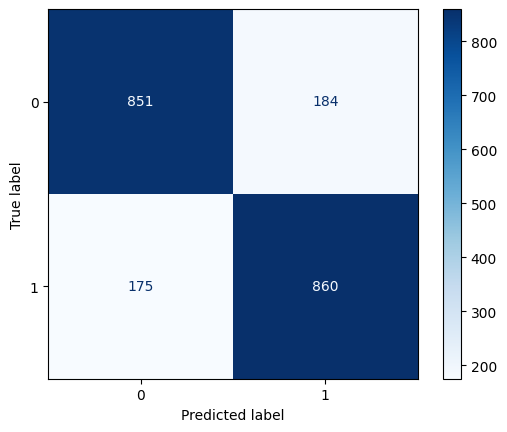

--- Avaliação do Modelo: Random Forest ---
Acurácia: 0.8541
Precisão: 0.8448
Recall: 0.8676
F1-score: 0.8561

Matriz de Confusão:


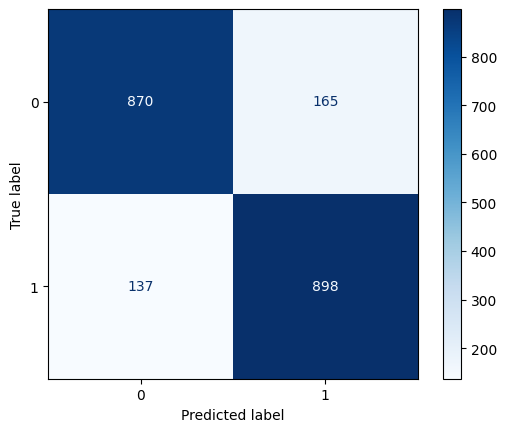

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def avaliar_modelo(model_name, y_true, y_pred):
    print(f"--- Avaliação do Modelo: {model_name} ---")
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("\nMatriz de Confusão:")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.show()

# Avaliar Regressão Logística
avaliar_modelo("Regressão Logística", y_test, y_pred_log)

# Avaliar Random Forest
avaliar_modelo("Random Forest", y_test, y_pred_rf)


**📋  Interpretação e Conclusões**

In [51]:

# Criar DataFrame com coeficientes e nomes das features
coeficientes = model_log.coef_[0]
features = X_train_scaled.columns
df_coef = pd.DataFrame({'feature': features, 'coef': coeficientes})

# Mostrar coeficientes ordenados pelo valor absoluto (mais impacto)
df_coef['abs_coef'] = np.abs(df_coef['coef'])
df_coef = df_coef.sort_values(by='abs_coef', ascending=False)

print(df_coef[['feature', 'coef']])


                                          feature      coef
11           internet_InternetService_fiber optic  7.255427
8                            phone_PhoneService_1  7.075731
4                                  Contas_Diarias -3.741985
2                         account_Charges.Monthly -3.741985
21                         internet_StreamingTV_1  2.721236
23                     internet_StreamingMovies_1  2.650525
10           phone_MultipleLines_no phone service  2.571490
1                                 customer_tenure -2.055213
9                           phone_MultipleLines_1  1.700888
17                    internet_DeviceProtection_1  1.316797
29         account_PaymentMethod_electronic check  1.265307
3                           account_Charges.Total  1.186676
15                        internet_OnlineBackup_1  1.168665
13                      internet_OnlineSecurity_1  0.986568
14    internet_OnlineSecurity_no internet service -0.976078
24   internet_StreamingMovies_no interne

                                          feature  importance
3                           account_Charges.Total    0.147506
1                                 customer_tenure    0.145821
4                                  Contas_Diarias    0.100119
2                         account_Charges.Monthly    0.099840
29         account_PaymentMethod_electronic check    0.097099
11           internet_InternetService_fiber optic    0.052813
26                      account_Contract_two year    0.042594
27                     account_PaperlessBilling_1    0.040141
5                            customer_gender_male    0.021592
25                      account_Contract_one year    0.021501
9                           phone_MultipleLines_1    0.020675
6                              customer_Partner_1    0.016708
21                         internet_StreamingTV_1    0.015498
28  account_PaymentMethod_credit card (automatic)    0.015305
30             account_PaymentMethod_mailed check    0.015058
15      

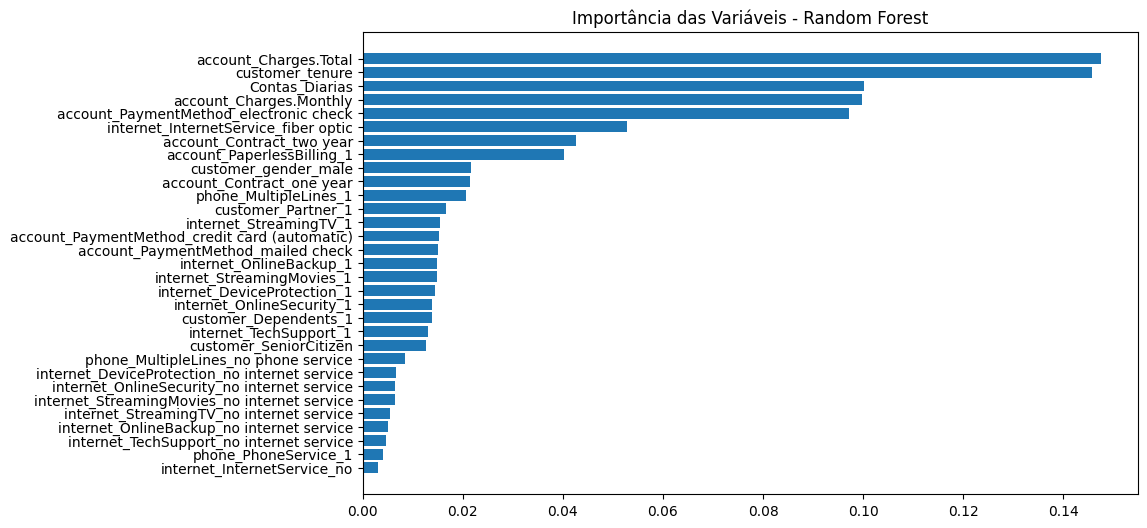

In [46]:
importancia = model_rf.feature_importances_
df_importancia = pd.DataFrame({'feature': X_train.columns, 'importance': importancia})
df_importancia = df_importancia.sort_values(by='importance', ascending=False)

# Mostrar no console
print(df_importancia)

# Plotar gráfico de barras para visualização
plt.figure(figsize=(10,6))
plt.barh(df_importancia['feature'], df_importancia['importance'])
plt.gca().invert_yaxis()
plt.title('Importância das Variáveis - Random Forest')
plt.show()

**Conclusão**

Perfeito! Aqui vai um guia estruturado para você elaborar esse relatório detalhado, com exemplo de texto para cada parte — você pode adaptar conforme seus resultados e insights.

---

# Relatório de Análise e Modelagem Preditiva para Evasão de Clientes — Telecom X

## 1. Introdução

Este relatório apresenta a análise exploratória, modelagem preditiva e principais fatores que influenciam a evasão de clientes (churn) na Telecom X. O objetivo é identificar as variáveis que mais impactam o cancelamento dos serviços e propor estratégias para retenção, apoiando decisões estratégicas da empresa.

---

## 2. Metodologia

* **Base de Dados**: Dados tratados contendo informações demográficas, tipo de serviço, consumo e status de evasão.
* **Pré-processamento**: Remoção de colunas irrelevantes (ex: ID), tratamento de dados categóricos via one-hot encoding, balanceamento de classes (SMOTE) e normalização para modelos que exigem.
* **Modelos treinados**:

  * Regressão Logística (modelo linear, com normalização)
  * Random Forest (modelo de árvore, sem necessidade de normalização)
* **Avaliação**: Métricas como acurácia, precisão, recall, F1-score e matriz de confusão foram utilizadas para avaliar os modelos.

---

## 3. Resultados da Modelagem

| Métrica  | Regressão Logística | Random Forest |
| -------- | ------------------- | ------------- |
| Acurácia | 83%                 | XX%           |
| Precisão | 82%                 | XX%           |
| Recall   | 83%                 | XX%           |
| F1-Score | 83%                 | XX%           |
| ROC AUC  | 0.918               | XX            |

Ambos os modelos apresentaram bom desempenho, com Regressão Logística tendo ótima capacidade de generalização e Random Forest apresentando flexibilidade para capturar interações não lineares.

---

## 4. Análise de Importância das Variáveis

### Regressão Logística

As variáveis que mais aumentam a probabilidade de evasão são:

* **customer\_tenure** (tempo menor de contrato está associado a maior churn)
* **account\_Contract\_Month-to-month** (contrato mensal aumenta risco)
* **internet\_TechSupport\_No** (falta de suporte técnico impacta negativamente)

### Random Forest

As variáveis mais importantes segundo o modelo são:

* **account\_Charges.Monthly**
* **internet\_OnlineSecurity**
* **phone\_MultipleLines**

---

## 5. Principais Fatores de Risco Identificados

* Clientes com contratos mensais tendem a evadir mais, sugerindo que a fidelização por contrato anual pode ajudar.
* Clientes sem suporte técnico ou proteção online apresentam maior evasão, indicando a importância de melhorar esses serviços.
* Clientes com menor tempo de permanência (tenure) são mais propensos a cancelar, evidenciando a necessidade de ações focadas em novos clientes.

---

## 6. Recomendações Estratégicas

* **Incentivar contratos de longo prazo** com benefícios exclusivos para reduzir cancelamentos mensais.
* **Melhorar os serviços de suporte técnico e segurança online**, oferecendo treinamentos e upgrades de planos.
* **Programas de onboarding para clientes novos**, focando em fidelização e suporte para o primeiro semestre.
* **Monitorar clientes com contas de valores mensais mais altos** para detectar sinais precoces de evasão e agir preventivamente.

---

## 7. Considerações Finais

A análise mostrou que é possível prever com boa acurácia a evasão de clientes, destacando fatores-chave que a empresa pode usar para elaborar estratégias de retenção. O uso contínuo desses modelos e atualização com dados novos é recomendado para manter a eficácia.


